In [73]:
from typing import TypedDict, List, Optional
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [74]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    final: int

In [75]:
def adder(state: AgentState) -> AgentState:
    """ This state agent adds 2 numbers """

    state['final'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """ This state agent subtracts 2 numbers """

    state['final'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> Optional[str]:
    """ This node decides the next node of the graph """
    if state['operation'] == "+":
        return "addition_node"
    elif state['operation'] == "-":
        return "subtraction_node"

In [76]:
graph = StateGraph(AgentState)
graph.add_node(node="add_node", action=adder)
graph.add_node(node="subtract_node", action=subtractor)
graph.add_node(node="router", action=lambda state: state)

graph.add_edge(start_key=START, end_key="router")
graph.add_edge(start_key="add_node", end_key=END)
graph.add_edge(start_key="subtract_node", end_key=END)

graph.add_conditional_edges(
    source="router",
    path=decide_next_node,
    path_map= {
        "addition_node": "add_node",
        "subtraction_node": "subtract_node"
    }
)
app = graph.compile()

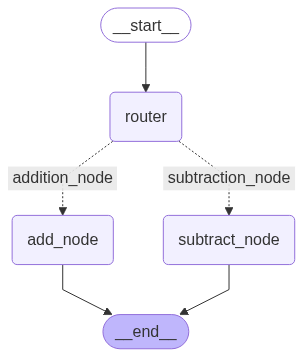

In [77]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [78]:
initial_state = AgentState(number1 = 10, number2 = 9, operation = "+") #type: ignore
app.invoke(input=initial_state)

{'number1': 10, 'number2': 9, 'operation': '+', 'final': 19}

In [79]:
answer = app.invoke({
    "number1": 10,
    "number2": 5,
    "operation": "+"
})
answer

{'number1': 10, 'number2': 5, 'operation': '+', 'final': 15}